In [1]:
#Load required libraries
import os
import csv
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import codecs
import pandas as pd
import matplotlib.pyplot as plt

# 1- Extract Data from Twitter

In [2]:
#Store required keys
consumer_key = "vjod2Q5I5ZuaTp7nlOKUhBqlT"
consumer_secret = "CzK4Zxzam3AUJpwOWaBTP4eW9RgSrT1JtRhzIHJScYgIymzwc2"
access_key = "3263204311-kztNtRhYvyAiRvIKcNiWyiDsaUePg7vgg3Be7zE"
access_secret = "LA9OUafVi0JEuBjo73T4dvrYFiIldUf9xMBCDrtfwKWNq"

In [3]:
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [4]:
#Extract tweets
#Create empty list
results = []

#Get the first 1000 items based on the search query
for tweet in tweepy.Cursor(api.search, q = 'ex machina').items(1000):
    results.append(tweet)

In [5]:
len(results)

1000

In [6]:
type(results)

list

In [7]:
#Convert list into dataframe
def toDataFrame(tweets):
    #Create empty data frame
    DataSet = pd.DataFrame()
    
    #extract relevant information
    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

In [8]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [9]:
DataSet.head()

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,987234132005548033,@mschomm It's a good place to visit. Lots of p...,0,0,Twitter Web Client,2018-04-20 07:38:53,94217437,diva_ex_machina,diva ex machina,2009-12-03 00:48:35,"Of diva dogs, art, and science. Dyslexic. You'...",2085,1466,Tasmania,Sydney
1,987233506500726785,#CercasiGesù è stata una tappa cinematografica...,0,0,Twitter Web Client,2018-04-20 07:36:24,396155470,bluestenyeyes,erste,2011-10-22 20:48:15,,27,88,,None
2,987232958389080064,@diva_ex_machina Loved to see them all around ...,0,0,Twitter Web Client,2018-04-20 07:34:13,2770046213,mschomm,Schomma,2014-09-14 13:50:55,"All-natural, equal opportunity non-believer. L...",215,478,Bonn,International Date Line West
3,987232166684667904,My homework for philosophy is to watch ex mach...,0,0,Twitter for iPhone,2018-04-20 07:31:05,4106667012,hapbegabe,g,2015-11-02 23:19:13,watching the moonlight,479,385,Vermont,None
4,987230763803291649,"@diva_ex_machina Well, it's her life and that ...",0,1,Twitter for Android,2018-04-20 07:25:30,19476729,Wolfie_Rankin,Wolfie Rankin,2009-01-25 03:49:10,"Wolfie Rankin, The Werewolf of Melbourne. Reco...",4896,3626,"Melbourne, Australia",Melbourne


In [10]:
#Dataset(Raw) for sentiment Analysis
rawData = DataSet[['tweetID','tweetText']]

In [12]:
rawData.head(10)

,tweetID,tweetText
0,987234132005548033,@mschomm It's a good place to visit. Lots of p...
1,987233506500726785,#CercasiGesù è stata una tappa cinematografica...
2,987232958389080064,@diva_ex_machina Loved to see them all around ...
3,987232166684667904,My homework for philosophy is to watch ex mach...
4,987230763803291649,"@diva_ex_machina Well, it's her life and that ..."
5,987230437519966208,@Wolfie_Rankin Paddys don't live very long I'm...
6,987228112705478656,Here’s some of mine!\n\n1.Eternal Sunshine\n\n...
7,987225315050221568,Froid dans le dos (Au sens propre)
8,987225206086426624,RT @Blvckndn: Aller à une soirée ou cest pas t...
9,987224957607464960,RT @Onikayy: Participez à votre Miss Twitter l...


# 2- Pre-processing

In [19]:
#Remove the special characters
import re

#Remove all non- significant words
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

#Extract root words(Stemming)
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /Users/ajeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
corpus = []
for i in range(0, 1000):
             review = re.sub('[^a-zA-Z]', ' ', rawData['tweetText'][i])
             review = review.lower()
             review = review.split()
             ps = PorterStemmer()
             review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
             review = ' '.join(review)
             #print(review)
             corpus.append(review)

In [16]:
type(corpus)

list

In [17]:
corpus[1:5]

['cercasig stata una tappa cinematografica di beppegrillo ora il deu ex machina del sembra aver trovato http co bkxhptiift',
 'diva ex machina love see around tasmania cours never saw one slee http co zsbzkdda',
 'homework philosophi watch ex machina http co qrsu qkuvw',
 'diva ex machina well life five year might enough']

In [24]:
CleanDf = pd.DataFrame(corpus)

In [25]:
CleanDf.head()

,0
0,mschomm good place visit lot paddi cradl mount...
1,cercasig stata una tappa cinematografica di be...
2,diva ex machina love see around tasmania cours...
3,homework philosophi watch ex machina http co q...
4,diva ex machina well life five year might enough


In [26]:
CleanDf = CleanDf.rename(columns={0: "comments"})

In [27]:
CleanDf.head(2)

,comments
0,mschomm good place visit lot paddi cradl mount...
1,cercasig stata una tappa cinematografica di be...


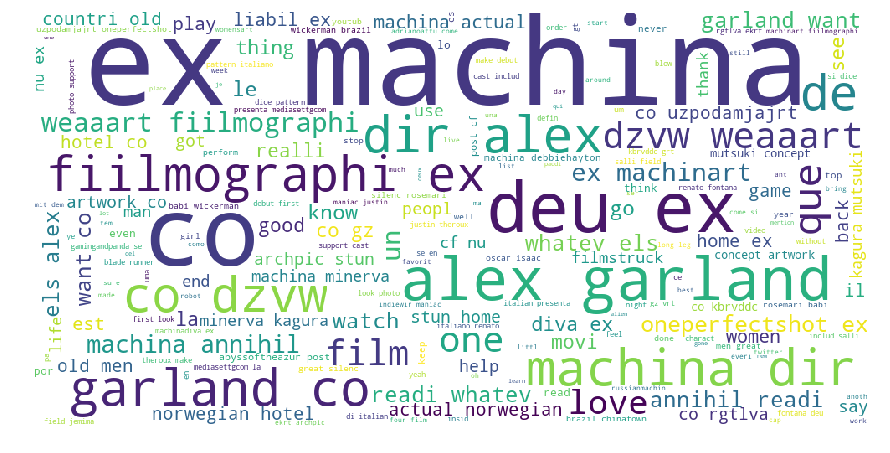

In [30]:
#Plot wordcloud 
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(CleanDf['comments']))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 3-Sentiment Analysis

In [31]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer

## A- With Raw Data

## 1- Sentiment analysis using Text Blob

In [36]:
# Sentiment analysis using Text Blob
# Create empty dataframe to store results
FinalResultsRaw = pd.DataFrame()

# Run Engine
for i in range(0, rawData.shape[0]):
    
    blob = TextBlob(rawData.iloc[i,1])
    
    temp = pd.DataFrame({'Comments': rawData.iloc[i,1], 'Polarity': blob.sentiment.polarity}, index = [0])
    
    FinalResultsRaw = FinalResultsRaw.append(temp)    

In [37]:
FinalResultsRaw.head()

,Comments,Polarity
0,@mschomm It's a good place to visit. Lots of p...,0.7
0,#CercasiGesù è stata una tappa cinematografica...,0.0
0,@diva_ex_machina Loved to see them all around ...,0.7
0,My homework for philosophy is to watch ex mach...,0.0
0,"@diva_ex_machina Well, it's her life and that ...",0.0


In [38]:
#Number of positive, Negative and the neutral Review
countPositive =0
countNegative = 0
countNeutral = 0
for i in range(0,1000):
    if(FinalResultsRaw.iloc[i,1] > 0):
        countPositive = countPositive + 1
    elif(FinalResultsRaw.iloc[i,1] < 0):
        countNegative = countNegative + 1
    else:
        countNeutral = countNeutral + 1
        
print(countPositive)
print(countNegative)
print(countNeutral)

308
125
567


In [42]:
reviewBlobWithPolarityRaw = [308,125,567]
labelsBlobPolarityRaw = ['positive','Negative','Neutral']

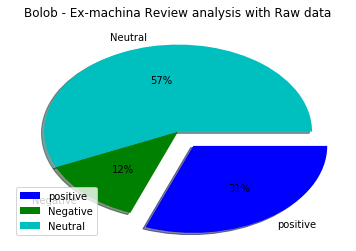

In [48]:
colors = ['b', 'g', 'c', 'c', 'm', 'y']
explode = (0.2, 0, 0)
plt.pie(reviewBlobWithPolarityRaw, colors=colors, labels = labelsBlobPolarityRaw,autopct='%1.0f%%',explode=explode,counterclock=False, shadow=True)
plt.title('Bolob - Ex-machina Review analysis with Raw data')
plt.legend(labelsBlobPolarityRaw,loc=3)
plt.show()

## 2-Sentiment Analysis using Vader

In [55]:
# Sentiment Analysis using Vader
FinalResultsVaderRaw = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, rawData.shape[0]):
    
    snt = analyzer.polarity_scores(rawData.iloc[i,1])
    
    temp = pd.DataFrame({'Comments': rawData.iloc[i,1], 'Polarity': list(snt.items())[3][1]}, index = [0])

    FinalResultsVaderRaw = FinalResultsVaderRaw.append(temp)   

In [56]:
FinalResultsVaderRaw.head()

,Comments,Polarity
0,@mschomm It's a good place to visit. Lots of p...,0.4404
0,#CercasiGesù è stata una tappa cinematografica...,0.0000
0,@diva_ex_machina Loved to see them all around ...,0.3506
0,My homework for philosophy is to watch ex mach...,0.0000
0,"@diva_ex_machina Well, it's her life and that ...",0.2732


In [57]:
#Number of positive, Negative and the Neutral Review
countPositive =0
countNegative = 0
countNeutral = 0
for i in range(0,1000):
    if(FinalResultsVaderRaw.iloc[i,1] > 0):
        countPositive = countPositive + 1
    elif(FinalResultsVaderRaw.iloc[i,1] < 0):
        countNegative = countNegative + 1
    else:
        countNeutral = countNeutral + 1
        
print(countPositive)
print(countNegative)
print(countNeutral)

322
166
512


In [58]:
reviewVaderWithPolarityRaw = [322,166,512]
labelsvaderPolarityRaw = ['positive','Negative','Neutral']

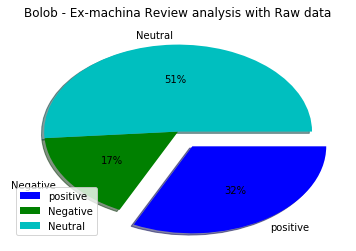

In [59]:
colors = ['b', 'g', 'c']
explode = (0.2, 0, 0)
plt.pie(reviewVaderWithPolarityRaw, colors=colors, labels = labelsvaderPolarityRaw,autopct='%1.0f%%',explode=explode,counterclock=False, shadow=True)
plt.title('Vedar - Ex-machina Review analysis with Raw data')
plt.legend(labelsvaderPolarityRaw,loc=3)
plt.show()

## B- With Preprocess(Clean) Data

In [60]:
CleanDf.head()

,comments
0,mschomm good place visit lot paddi cradl mount...
1,cercasig stata una tappa cinematografica di be...
2,diva ex machina love see around tasmania cours...
3,homework philosophi watch ex machina http co q...
4,diva ex machina well life five year might enough


## 1- Sentiment analysis using Text Blob on clean data

In [61]:
# Sentiment analysis using Text Blob
# Create empty dataframe to store results
FinalResultsClean = pd.DataFrame()

# Run Engine
for i in range(0, CleanDf.shape[0]):
    
    blob = TextBlob(CleanDf.iloc[i,0])
    
    temp = pd.DataFrame({'Comments': CleanDf.iloc[i,0], 'Polarity': blob.sentiment.polarity}, index = [0])
    
    FinalResultsClean = FinalResultsClean.append(temp)    

In [62]:
FinalResultsClean.head()

,Comments,Polarity
0,mschomm good place visit lot paddi cradl mount...,0.7
0,cercasig stata una tappa cinematografica di be...,0.0
0,diva ex machina love see around tasmania cours...,0.5
0,homework philosophi watch ex machina http co q...,0.0
0,diva ex machina well life five year might enough,0.0


In [63]:
#Number of positive, Negative and the Neutral Review
countPositive =0
countNegative = 0
countNeutral = 0
for i in range(0,1000):
    if(FinalResultsClean.iloc[i,1] > 0):
        countPositive = countPositive + 1
    elif(FinalResultsClean.iloc[i,1] < 0):
        countNegative = countNegative + 1
    else:
        countNeutral = countNeutral + 1
        
print(countPositive)
print(countNegative)
print(countNeutral)

232
115
653


In [65]:
reviewBlobWithPolarityClean = [232,115,653]
labelsBlobPolarityClean = ['positive','Negative','Neutral']

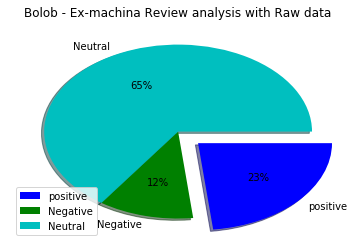

In [66]:
colors = ['b', 'g', 'c', 'c', 'm', 'y']
explode = (0.2, 0, 0)
plt.pie(reviewBlobWithPolarityClean, colors=colors, labels = labelsBlobPolarityClean,autopct='%1.0f%%',explode=explode,counterclock=False, shadow=True)
plt.title('Bolob - Ex-machina Review analysis with Raw data')
plt.legend(labelsBlobPolarityClean,loc=3)
plt.show()

## 2-Sentiment Analysis using Vader on clean data

In [67]:
# Sentiment Analysis using Vader
FinalResultsVaderClean = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, CleanDf.shape[0]):
    
    snt = analyzer.polarity_scores(CleanDf.iloc[i,0])
    
    temp = pd.DataFrame({'Comments': CleanDf.iloc[i,0], 'Polarity': list(snt.items())[3][1]}, index = [0])

    FinalResultsVaderClean = FinalResultsVaderClean.append(temp)   

In [68]:
#Number of positive, Negative and the Neutral Review
countPositive =0
countNegative = 0
countNeutral = 0
for i in range(0,1000):
    if(FinalResultsVaderClean.iloc[i,1] > 0):
        countPositive = countPositive + 1
    elif(FinalResultsVaderClean.iloc[i,1] < 0):
        countNegative = countNegative + 1
    else:
        countNeutral = countNeutral + 1
        
print(countPositive)
print(countNegative)
print(countNeutral)

289
144
567


In [69]:
reviewVaderWithPolarityClean = [289,144,567]
labelsvaderPolarityClean = ['positive','Negative','Neutral']

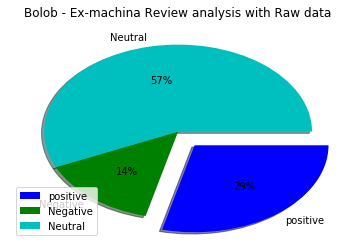

In [70]:
colors = ['b', 'g', 'c']
explode = (0.2, 0, 0)
plt.pie(reviewVaderWithPolarityClean, colors=colors, labels = labelsvaderPolarityClean,autopct='%1.0f%%',explode=explode,counterclock=False, shadow=True)
plt.title('Bolob - Ex-machina Review analysis with Raw data')
plt.legend(labelsvaderPolarityClean,loc=3)
plt.show()

## Analysis Table on the movie ex-machina

In [71]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [78]:
typeOfReview = ['Positive','Negative','Neutral']
PercentBlobRaw = [31,12,57]
PercentVedarRaw = [32,17,51]

PercentBlobClean = [23,12,65]
PercentVedarClean = [29,14,57]


df = pd.DataFrame({'typeOfReview': ['Positive','Negative','Neutral'],
                   'PercentBlobRaw': [31,12,57], 
                   'PercentVedarRaw': [32,17,51], 
                   'PercentBlobClean': [23,12,65], 
                   'PercentVedarClean': [29,14,57] })

In [79]:
df.head()

,PercentBlobClean,PercentBlobRaw,PercentVedarClean,PercentVedarRaw,typeOfReview
0,23,31,29,32,Positive
1,12,12,14,17,Negative
2,65,57,57,51,Neutral


In [90]:
df = df.iloc[:,[4,1,0,3,2]]

In [91]:
df.head()

,typeOfReview,PercentBlobRaw,PercentBlobClean,PercentVedarRaw,PercentVedarClean
0,Positive,31,23,32,29
1,Negative,12,12,17,14
2,Neutral,57,65,51,57


In [80]:
sns.barplot?

##### <font color = red>Conclusion</font>:We can clearly see that, the percentage of positive and negative review decreased when we pass the clean data in both the methods. 

## Plot The Summary

In [166]:
dfPlot = pd.DataFrame()

In [167]:
dfPlot = pd.DataFrame({'Type Of Review': "Positive",
                       'Type Of Method and data': "Blob-Raw",
                   'Value in percentage': [31]
                    })

In [168]:
temp = pd.DataFrame({'Type Of Review': "Positive",
                       'Type Of Method and data': "Blob-Clean",
                   'Value in percentage': [23]
                    })
dfPlot = dfPlot.append(temp)   

In [169]:
temp = pd.DataFrame({'Type Of Review': "Positive",
                       'Type Of Method and data': "Vedar-Raw",
                   'Value in percentage': [32]
                    })
dfPlot = dfPlot.append(temp)   

In [170]:
temp = pd.DataFrame({'Type Of Review': "Positive",
                       'Type Of Method and data': "Vedar-Clean",
                   'Value in percentage': [29]
                    })
dfPlot = dfPlot.append(temp)   

In [171]:
temp = pd.DataFrame({'Type Of Review': ["Negative","Negative","Negative","Negative"],
                       'Type Of Method and data': ["Blob-Raw","Blob-Clean","Vedar-Raw","Vedar-Clean"],
                   'Value in percentage': [12,12,17,14]
                    })
dfPlot = dfPlot.append(temp) 


In [172]:
temp = pd.DataFrame({'Type Of Review': ["Neutral","Neutral","Neutral","Neutral"],
                       'Type Of Method and data': ["Blob-Raw","Blob-Clean","Vedar-Raw","Vedar-Clean"],
                   'Value in percentage': [57,65,51,57]
                    })
dfPlot = dfPlot.append(temp)  

In [173]:
dfPlot

,Type Of Method and data,Type Of Review,Value in percentage
0,Blob-Raw,Positive,31
0,Blob-Clean,Positive,23
0,Vedar-Raw,Positive,32
0,Vedar-Clean,Positive,29
0,Blob-Raw,Negative,12
1,Blob-Clean,Negative,12
2,Vedar-Raw,Negative,17
3,Vedar-Clean,Negative,14
0,Blob-Raw,Neutral,57
1,Blob-Clean,Neutral,65


In [174]:
type(dfPlot['Value in percentage'])

pandas.core.series.Series

In [175]:
dfPlot['Value in percentage'].dtype

dtype('int64')

In [176]:
dfPlot['Value in percentage'] = dfPlot['Value in percentage'].astype('object')

In [177]:
dfPlot['Value in percentage'].dtype

dtype('O')

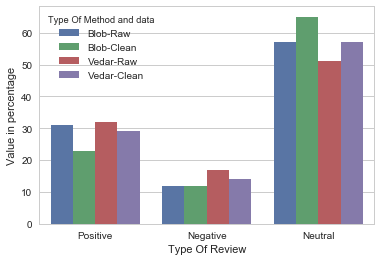

In [179]:
%matplotlib inline
sns.barplot(x="Type Of Review", y="Value in percentage", hue="Type Of Method and data", data=dfPlot);


In [180]:
sns.barplot?

##### <font color = red>Conclusion</font>:We can clearly see that, the percentage of positive and negative review decreased when we pass the clean data in both the methods. 